# 課題　教師なし学習（Wholesale customers data set）

## １　今回のゴール

### 教師なし学習の知識を生かし、顧客データをグループ分けする。正解ラベルのないデータを手にした時、それが扱えるようになることを目指す。

## ２　導入（教師なし学習とは）

### 教師なし学習とは、アルゴリズムの学習に教師情報を用いない機械学習の手法であり、アルゴリズムには入力データだけが与えられ、機械に自ら法則性や傾向等を学習させる手法である。これに対して、教師あり学習とは、教師情報を機械に与えて機械に学習させた上で、データを入力すると出力して予測数値を返したり分類したりする手法である。教師なし学習は、次のようなケースにおいて効果を発揮する。例えば、購買記録から顧客を分類して販売戦略を考える場合、アンケートなどの文章を分類してどういった内容のものがあるか見る場合等で、大量にあるデータをどのように分類して解析したら良いかの見当がつかない場合である。クラスタリングは、教師なし学習において代表される手法であり、データを自然なまとまりに分ける手法である。クラスタリング には階層的手法と非階層的手法があり、階層的手法には完全連結法・平均的連結法・ウォード法等があり、非階層的手法にはK-Means法がある。K-Means法とは、クラスタの平均の値を考えながら、指定したk個のクラスタに分類する手法である。

## ３　必要なライブラリーをImport

In [1]:
import numpy as np
import random as rnd
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from IPython.display import display
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples  # クラスタリングのシルエット分析
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage  # 階層的クラスタリング
from scipy.cluster.hierarchy import dendrogram

## ４　データ取得及び読み込み

In [2]:
data=pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
pd.set_option("display.max_rows",440)
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data_original = data.copy()

In [8]:
# 特徴量から'Channel'と'Region'を落とす。
del(data['Channel'])
del(data['Region'])

In [9]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [10]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [11]:
print('Wholesale customers has {} samples with {} features each'.format(*data.shape))

Wholesale customers has 440 samples with 6 features each


/Users/katouyoshitaka/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0f59c860>,
      dtype=object)

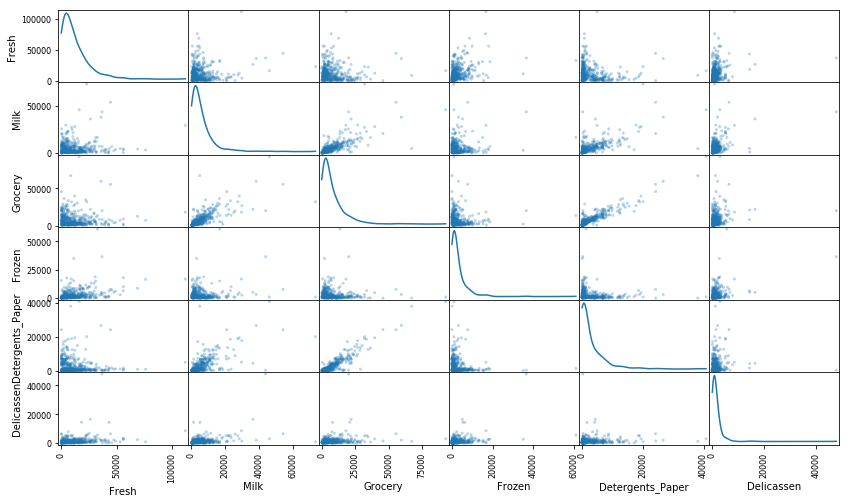

In [12]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

## ５　Feature Scaling

### feature scaling とは、特徴量の取りうる値の範囲（スケール）を変えることである。特徴量間でスケールが異なることはよくあり、例えば、体重と身長、家の価格と部屋数では、その単位と値の範囲が異なるので、その特徴量間のスケールに違いがあると、モデルをうまく学習させることができないことがある。このような場合に、学習前に特徴量間でスケールを揃える必要があることから、feature scaling が必要とされる。

In [13]:
# Scale the data using the natural logarithm
data_fs = np.log(data.copy())

In [14]:
data_fs.shape

(440, 6)

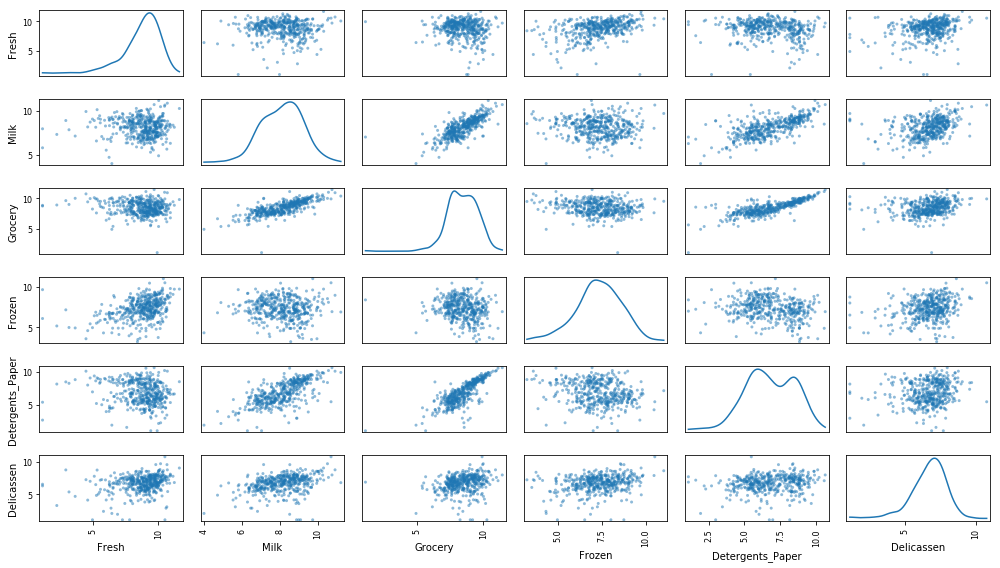

In [15]:
# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(data_fs, alpha=0.5, figsize=(14,8),diagonal='kde')
plt.tight_layout()

### Feature Scalingを行なった結果の方が、マトリックス表上で各特徴量間の相関関係が分かりやい。

## ６　Feature Extraction

### PCAは、Principal Component Analysis の略で、主成分分析といい、feature extraction の代表的な手法である。PCAの直感的なイメージは、相関のある特徴量どうしを1つの特徴量にまとめて特徴量の個数を減らし、すなわち、次元削減を行い、元の情報を圧縮する手法である。PCAを施すことで、over-fittingを防ぐことができる。

### ＜分散説明率の可視化＞

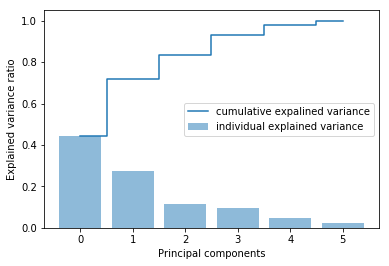

In [16]:
# 分散説明率の可視化
pca = PCA(n_components=None)
data_fs_pca = pca.fit_transform(data_fs)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(0,6), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,6), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

### 主成分が２個で累積寄与率（cumulative explained variance）が７０％を超える。

### ＜主成分を２個としてPCAを実行＞

In [17]:
data_pca=PCA(n_components=2)
data_fs_pca_tf=data_pca.fit_transform(data_fs)
data_fs_pca_tf

array([[-1.75098532e+00, -7.05152286e-02],
       [-1.80036534e+00, -8.69753573e-01],
       [-1.89373597e+00, -1.67662072e+00],
       [ 1.12731297e+00, -1.45798229e+00],
       [-7.96711467e-01, -2.46086569e+00],
       [-1.08382370e+00, -3.92942430e-01],
       [-1.13261002e+00,  2.01601862e-01],
       [-1.58247377e+00, -9.68196420e-01],
       [-8.71825215e-01,  5.96758895e-01],
       [-2.88888315e+00, -7.41102520e-01],
       [-2.11616786e+00, -7.48845431e-01],
       [ 9.91451442e-01, -6.27014670e-02],
       [-2.23259521e+00, -1.32782770e+00],
       [-1.90404777e+00, -1.33385723e+00],
       [-2.33337847e+00, -9.83570924e-01],
       [ 4.17284069e-01,  8.14298928e-01],
       [-2.80513630e+00,  1.95322632e+00],
       [ 2.52569663e-01, -6.04494310e-01],
       [-1.40226890e+00, -1.86546557e+00],
       [-1.01598970e+00,  4.15101430e-01],
       [-8.36133270e-01, -1.14744897e+00],
       [ 1.72471835e+00,  1.47340654e-01],
       [-1.54938706e-01, -2.82992022e+00],
       [-2.

In [18]:
data_fs_pca.shape

(440, 6)

In [19]:
data_fs_pca_tf.shape

(440, 2)

In [20]:
data_fs_pca_fit=data_pca.fit(data_fs)  # fit()は主成分分析。fit_transform()は分析結果を元にデータセットを主成分に変換する）
print(data_fs_pca_fit.components_)

[[ 0.17371704 -0.394463   -0.45436364  0.17219603 -0.74551495 -0.1494356 ]
 [-0.68513571 -0.16239926 -0.06937908 -0.487691   -0.04191162 -0.50970874]]


In [21]:
print(data_fs_pca_fit.mean_)

[8.73054404 8.12104707 8.44116877 7.30139574 6.78597202 6.66513305]


In [22]:
print(data_fs_pca_fit.get_covariance())

[[ 1.95028895 -0.02782072 -0.21395597  0.87559902 -0.46223749  0.682264  ]
 [-0.02782072  1.4611146   0.7547801  -0.09772342  1.21208157  0.42663758]
 [-0.21395597  0.7547801   1.61938148 -0.24205005  1.38501262  0.35609114]
 [ 0.87559902 -0.09772342 -0.24205005  1.42568679 -0.47629349  0.45612814]
 [-0.46223749  1.21208157  1.38501262 -0.47629349  3.03411863  0.50155717]
 [ 0.682264    0.42663758  0.35609114  0.45612814  0.50155717  1.44544367]]


In [23]:
print(data_fs_pca_fit.explained_variance_)

[4.83781898 3.02459061]


In [24]:
data_fs_pca_tf_df=pd.DataFrame(data_fs_pca_tf)
data_fs_pca_tf_df.index=data.index
data_fs_pca_tf_df.columns=['PC1','PC2']
data_fs_pca_tf_df.head()

,PC1,PC2
0,-1.750985,-0.070515
1,-1.800365,-0.869754
2,-1.893736,-1.676621
3,1.127313,-1.457982
4,-0.796711,-2.460866


In [25]:
data_fs_pca_tf_df

,PC1,PC2
0,-1.750985,-0.070515
1,-1.800365,-0.869754
2,-1.893736,-1.676621
3,1.127313,-1.457982
4,-0.796711,-2.460866
5,-1.083824,-0.392942
6,-1.132610,0.201602
7,-1.582474,-0.968196
8,-0.871825,0.596759
9,-2.888883,-0.741103


In [26]:
data_fs_pca_tf_df['Channel']=data_original['Channel']
data_fs_pca_tf_df['Region']=data_original['Region']
data_fs_pca_tf_df

,PC1,PC2,Channel,Region
0,-1.750985,-0.070515,2,3
1,-1.800365,-0.869754,2,3
2,-1.893736,-1.676621,2,3
3,1.127313,-1.457982,1,3
4,-0.796711,-2.460866,2,3
5,-1.083824,-0.392942,2,3
6,-1.132610,0.201602,2,3
7,-1.582474,-0.968196,2,3
8,-0.871825,0.596759,1,3
9,-2.888883,-0.741103,2,3


### ＜PCAの散布図を作成＞

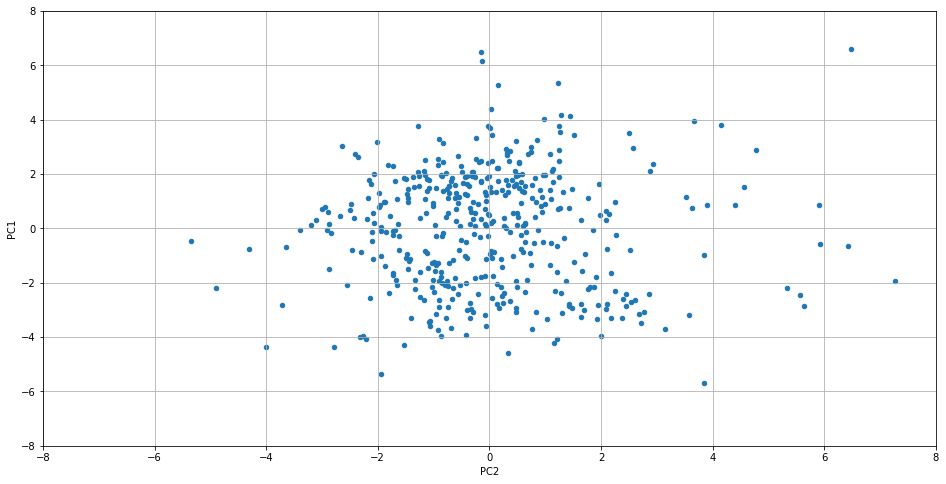

In [27]:
data_fs_pca_tf_df.plot(kind='scatter',x='PC2',y='PC1',figsize=(16,8))
plt.grid()
plt.xlim(-8,8);
plt.ylim(-8,8);
# data_fs_pca_tfだと、散布図は作成不可。'numpy.ndarray' object has no attribute 'plot'と出てしまう。

## ７　クラスタリング

### クラスタリングは、教師なし学習において代表されるものであり、データを自然なまとまりに分ける手法である。例えば、購買記録から顧客を分類して販売戦略を考える場合、アンケートなどの文章を分類してどういった内容のものがあるか見る場合等で、大量にあるデータをどのように分類して解析したら良いかの見当がつかない場合に、クラスタリングの手法が使用される。クラスタリング には階層的手法と非階層的手法があり、階層的手法には凝集型（agglomerative)と分岐型（divisive）の手法がある。凝集型（agglomerative)の階層的手法には、完全連結法・平均的連結法・ウォード法等があり、各サンプル１つずつが別のクラスタに属する状態からはじめ、距離の近いクラスタを凝集させていくという方法である。どのような基準で凝集させるかの違いでいろいろな手法が存在する。非階層的手法にはK-Means法があり、これは、クラスタの平均の値を考えながら指定したk個のクラスタに分類する手法である。その際に、評価関数（例えばクラスタ内誤差平方和、SSE）を定義し、これが最適になるような分割を行う。大量のデータを扱うときは一般的にK-Means法が使われている。

### クラス分類（classification）とクラスタリングは、どちらもデータを分ける手法であるが、クラス分類は教師あり学習であり、クラスタリングは教師なし学習の手法である。クラス分類の場合は事前に分類が用意されていて、そこにデータを正しく入れていく作業であり、何にどう分けるのかを人間が与えるので、「教師あり」の手法となる。一方、クラスタリングの場合には、分類は用意されておらず、データを読み込んで機械が分類して行くという「教師なし」の手法である。

### ＜樹状図＞

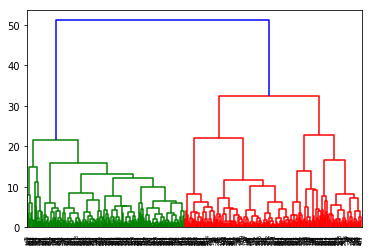

In [28]:
row_clusters = linkage(pdist(data_fs, metric='euclidean'), method='ward')  # ウォード法（'ward'),正規化
row_dender = dendrogram(row_clusters)
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_ward = ward.fit_predict(data)
print('Cluster labels:'+str())

Cluster labels:


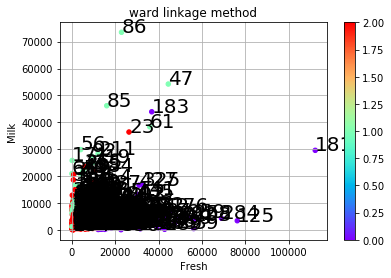

In [30]:
fig, ax = plt.subplots()
plt.title('ward linkage method')
data.plot(0,1,kind='scatter',ax=ax, c=y_ward, cmap=plt.cm.rainbow)
for k, v in data.iterrows():
    ax.annotate(k,xy=(v[0],v[1]),size=20)
plt.grid()
plt.show()

### ＜k-meansにおけるkの値の検討＞

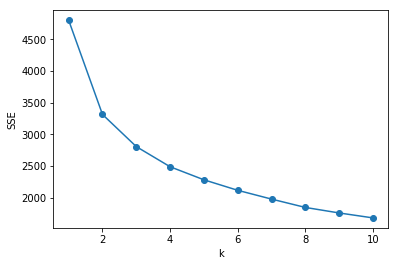

In [31]:
SSE = []
for i in range(1,11):  # クラスタ数が１〜１１まで、順番に計算する
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data_fs)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [32]:
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_fs)
print(y_km)

[2 2 2 0 0 2 2 2 2 2 2 1 2 2 2 1 3 0 2 2 2 1 0 2 2 3 1 1 2 0 2 0 1 0 1 3 0
 2 3 0 0 2 3 3 3 2 2 2 2 2 0 3 2 3 0 2 2 3 1 2 3 2 2 2 0 3 3 2 0 1 0 2 0 0
 2 1 0 2 1 2 1 3 2 0 2 2 2 0 1 0 1 0 2 0 3 3 3 1 1 1 2 2 2 0 0 1 3 2 3 3 1
 2 0 0 1 1 1 0 0 0 0 1 1 2 0 0 0 2 3 0 0 1 1 1 1 1 2 3 1 1 0 1 1 0 1 2 1 0
 1 1 1 1 1 1 1 2 2 0 2 3 2 1 0 2 2 2 2 3 1 1 3 3 3 3 1 3 0 1 1 0 2 2 3 0 3
 1 1 3 2 3 1 1 1 3 1 0 0 2 0 1 2 2 0 3 1 3 1 3 2 2 0 2 1 2 2 2 3 1 3 1 1 3
 1 0 1 0 2 1 1 0 0 2 1 3 0 3 1 1 1 0 0 0 0 2 2 2 1 1 1 0 1 2 0 2 2 1 1 0 0
 0 1 1 1 2 3 0 2 0 2 1 1 1 1 0 1 1 0 1 0 2 1 2 0 0 0 1 1 0 1 1 1 1 0 2 0 3
 0 2 2 1 2 2 3 3 3 3 2 1 1 3 0 0 3 1 0 2 1 2 1 2 1 0 0 2 0 0 1 1 0 0 0 2 0
 2 0 2 1 0 1 0 3 2 3 3 1 3 2 2 1 2 1 2 1 3 0 1 1 3 0 1 0 1 1 1 1 2 1 1 1 1
 0 0 0 2 1 1 2 1 1 3 0 0 2 1 0 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 0 1 1 0 1 0
 2 2 2 2 0 3 0 0 2 2 2 3 2 3 2 0 2 2 0 2 0 0 1 1 0 1 1 2 0 0 2 1 1]


In [33]:
km.labels_

array([2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 3, 0, 2, 2, 2, 1,
       0, 2, 2, 3, 1, 1, 2, 0, 2, 0, 1, 0, 1, 3, 0, 2, 3, 0, 0, 2, 3, 3,
       3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 0, 2, 2, 3, 1, 2, 3, 2, 2, 2, 0, 3,
       3, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 3, 2, 0, 2, 2, 2, 0,
       1, 0, 1, 0, 2, 0, 3, 3, 3, 1, 1, 1, 2, 2, 2, 0, 0, 1, 3, 2, 3, 3,
       1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 3, 0, 0, 1,
       1, 1, 1, 1, 2, 3, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 3, 2, 1, 0, 2, 2, 2, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3,
       0, 1, 1, 0, 2, 2, 3, 0, 3, 1, 1, 3, 2, 3, 1, 1, 1, 3, 1, 0, 0, 2,
       0, 1, 2, 2, 0, 3, 1, 3, 1, 3, 2, 2, 0, 2, 1, 2, 2, 2, 3, 1, 3, 1,
       1, 3, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 3, 0, 3, 1, 1, 1, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2,
       3, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 2, 0, 3, 0, 2, 2, 1, 2,

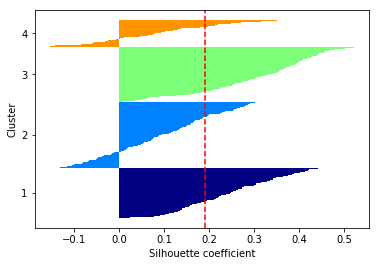

In [34]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_fs, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [35]:
km_3 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km_3 = km_3.fit_predict(data_fs)

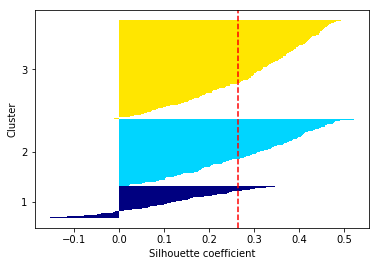

In [36]:
cluster_labels = np.unique(y_km_3)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_fs, y_km_3, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km_3 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [37]:
km_5 = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km_5 = km_5.fit_predict(data_fs)

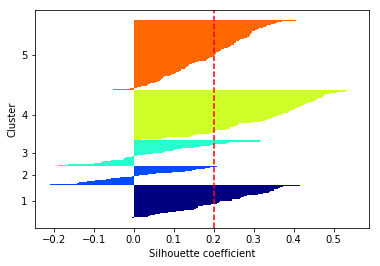

In [38]:
cluster_labels = np.unique(y_km_5)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_fs, y_km_5, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km_5 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

### ＜kの決定＞

### k-means法におけるkの値を４とする。上述の樹状図、エルボー法、シルエット分析により、総合的に勘案して、kの値は４が適切と考えた。

In [39]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit(data_fs)

data_fs['cluster'] = pd.Series(clusters.labels_, index=data_fs.index)

In [40]:
data_fs['cluster'].value_counts()

3    143
2    124
1    114
0     59
Name: cluster, dtype: int64

### ＜クラスティング散布図＞

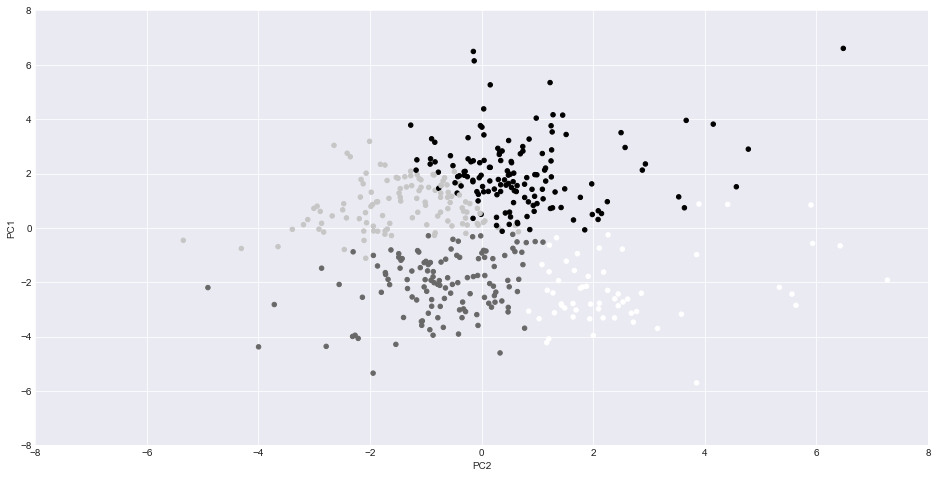

In [120]:
data_fs_pca_tf_df.plot(kind='scatter',x='PC2',y='PC1',c=data_fs['cluster'],figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')
plt.show()

### ＜各クラスタのセントロイド＞

In [42]:
clusters_pca = kmeans.fit(data_fs_pca_tf)
centers=clusters_pca.cluster_centers_
DataFrame(centers,columns=['PCA1','PCA2'])

,PCA1,PCA2
0,2.320723,0.875865
1,-2.191095,-0.768860
2,0.863565,-1.122885
3,-2.107041,2.529302


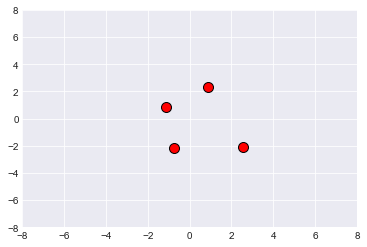

In [43]:
plt.scatter(centers[:, 1], centers[:, 0], c='r',s=100,
                facecolors='none', edgecolors='black')
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')
plt.show()

### ＜各クラスタのセントロイドをクラスティング散布図にプロット＞

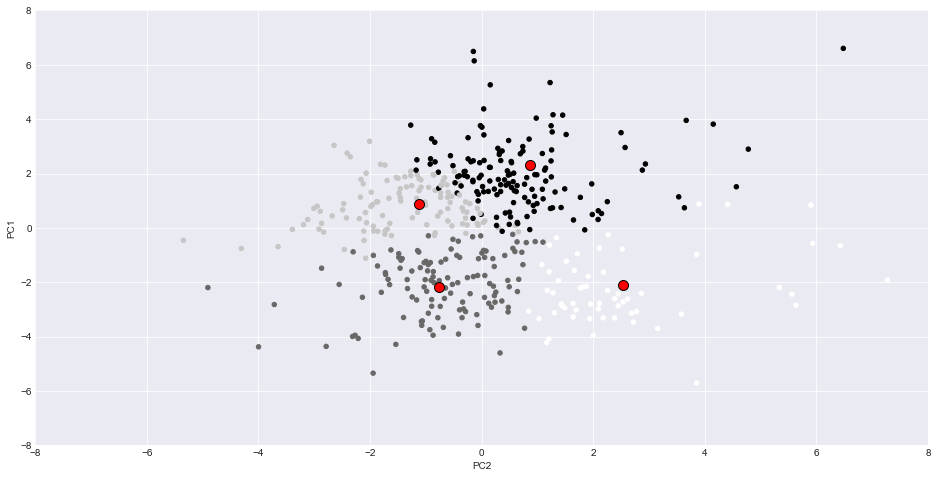

In [44]:
data_fs_pca_tf_df.plot(kind='scatter',x='PC2',y='PC1',c=data_fs['cluster'],figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')

plt.scatter(centers[:, 1], centers[:, 0], c='r',s=100,
                facecolors='none', edgecolors='black')
plt.show()

## ８　クラスタを見る

## （１）＜考察の方向性＞

### クラスタリング により４グループに分けて考察すべきと判断する。そもそも、クラスタリングをせずに、Channel毎及びRegion毎に区分して考察することも考えられるが得策ではない。なぜなら、Channel毎に２つに分けたケースは、クラスタリングによる分類結果に重複しているように見受けられ（下表参照）、かつ、クラスティングにより４つに分けた場合に含めて考察した方が効率的であり、また、Region毎に分けた場合は、各Regionの散布状況が近似している（下表参照）為に考察しづらいともいえるからである。従って、先ずはクラスタリングにより分類した上で、その分類結果の考察の過程で、Channel毎及びRegion毎の分類内容を参考にしながら考察するものとする。 

### ＜Channel １、２の散布図＞

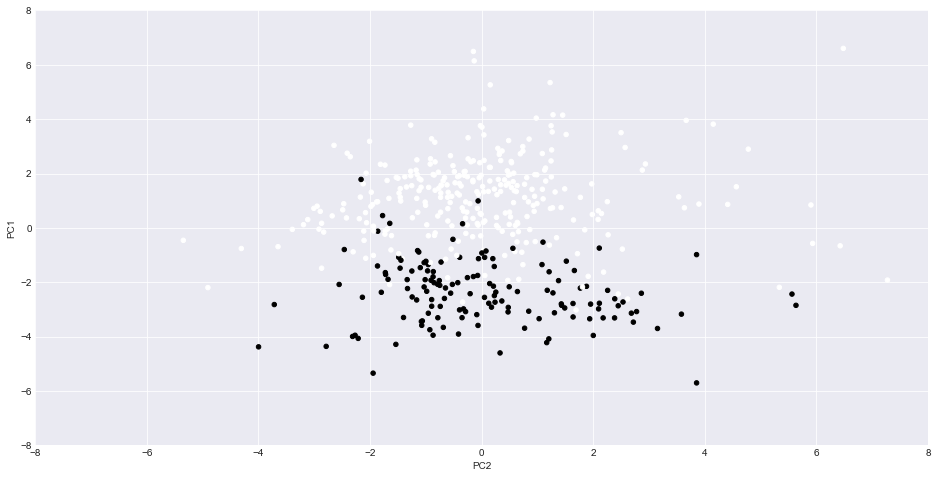

In [45]:
data_fs_pca_tf_df.plot(kind='scatter',x='PC2',y='PC1',c=data_original['Channel'],figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid') # 白プロットがChannel1、黒プロットがChannel2である。

### Channel毎に概ね分布が分かれている。

In [46]:
data_fs_pca_tf_df.groupby(['Channel','Region']).count()

PC1  PC2
Channel Region          
1       1        59   59
        2        28   28
        3       211  211
2       1        18   18
        2        19   19
        3       105  105

In [47]:
data_fs_pca_tf_df[data_original['Channel']==1] # 上図（Channel分布図）中の白色プロットが該当している事が分かる。

,PC1,PC2,Channel,Region
3,1.127313,-1.457982,1,3
8,-0.871825,0.596759,1,3
15,0.417284,0.814299,1,3
17,0.252570,-0.604494,1,3
19,-1.015990,0.415101,1,3
21,1.724718,0.147341,1,3
22,-0.154939,-2.829920,1,3
26,1.882829,-0.428675,1,3
27,2.396603,0.537053,1,3
29,0.573919,-1.143756,1,3


In [48]:
data_fs_pca_tf_df[data_original['Channel']==2] # 上図（Channel分布図）中の黒色プロットが該当していることが分かる。

,PC1,PC2,Channel,Region
0,-1.750985,-0.070515,2,3
1,-1.800365,-0.869754,2,3
2,-1.893736,-1.676621,2,3
4,-0.796711,-2.460866,2,3
5,-1.083824,-0.392942,2,3
6,-1.132610,0.201602,2,3
7,-1.582474,-0.968196,2,3
9,-2.888883,-0.741103,2,3
10,-2.116168,-0.748845,2,3
11,0.991451,-0.062701,2,3


### ＜Region １、２、３の散布図＞

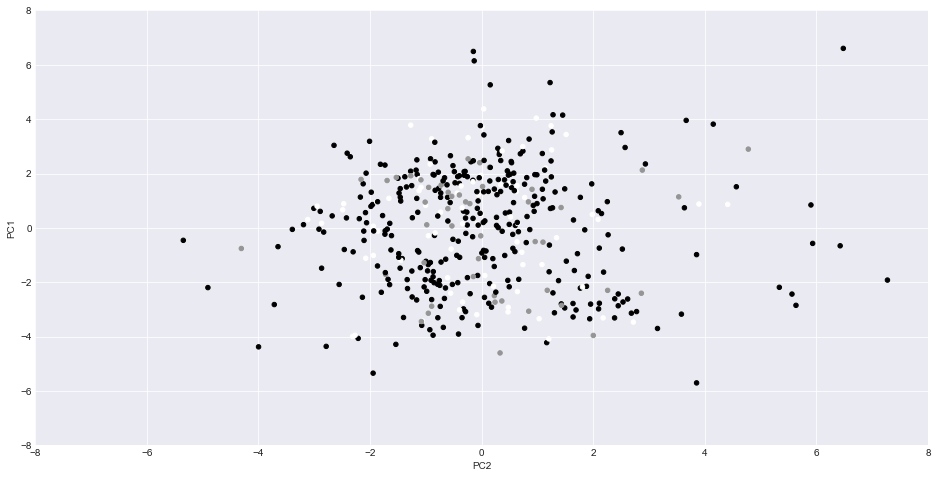

In [49]:
data_fs_pca_tf_df.plot(kind='scatter',x='PC2',y='PC1',c=data_original['Region'],figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid') # 白プロットがRegion1,灰色プロットがRegion2,黒プロットがRegion3である（下記表から）

### 各Regionが同じように分布しており、分布図からは各Regionの分布の特徴は把握出来ない。   

In [50]:
data_fs_pca_tf_df.groupby(['Region','Channel']).count()

PC1  PC2
Region Channel          
1      1         59   59
       2         18   18
2      1         28   28
       2         19   19
3      1        211  211
       2        105  105

### ＜Region １（参考まで）＞

In [51]:
data_fs_pca_tf_df[data_original['Region']==1]

,PC1,PC2,Channel,Region
196,0.305438,-3.115530,1,1
197,-2.145407,0.212090,2,1
198,0.577468,-0.735445,1,1
199,1.118163,0.771778,1,1
200,-3.018189,-0.395238,2,1
201,-3.424154,-1.062006,2,1
202,0.169193,-2.867546,1,1
203,0.862883,4.410326,1,1
204,4.037981,0.979175,1,1
205,-3.341808,1.030659,2,1


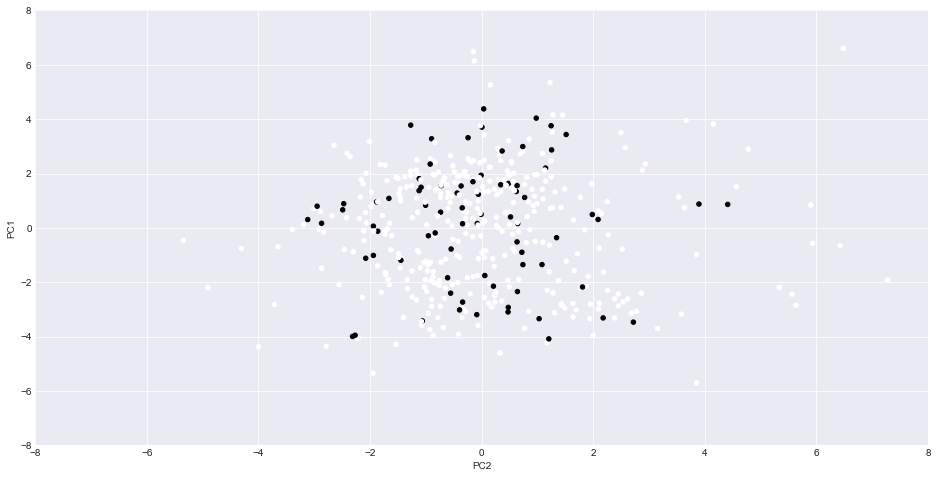

In [52]:
data_fs_pca_tf_df.plot(kind='scatter',x='PC2',y='PC1',c=data_original['Region']==1,figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid') # 黒プロットがRegion１である。

### ＜Region ２（参考まで）＞

In [53]:
data_fs_pca_tf_df[data_original['Region']==2]

,PC1,PC2,Channel,Region
293,-2.494295,0.228711,2,2
294,0.112531,-0.982644,1,2
295,-0.525059,1.100084,2,2
296,0.947178,-1.011637,1,2
297,-1.133544,-0.055804,2,2
298,-1.792142,-0.148152,2,2
299,1.140701,3.532544,1,2
300,-1.279946,-1.030016,2,2
301,-2.690495,0.362636,2,2
302,-2.296951,1.176450,2,2


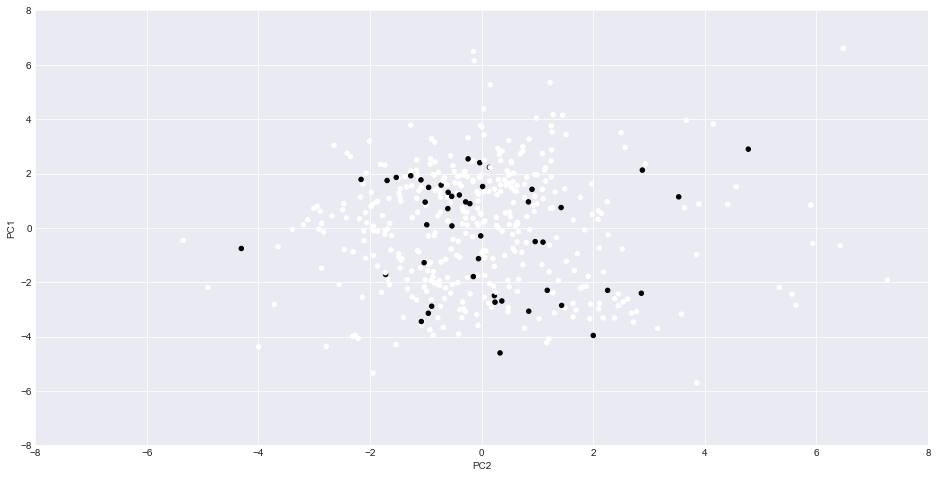

In [54]:
data_fs_pca_tf_df.plot(kind='scatter',x='PC2',y='PC1',c=data_original['Region']==2,figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid') # 黒プロットがRegion2である。

### ＜Region ３（参考まで）＞

In [55]:
data_fs_pca_tf_df[data_original['Region']==3]

,PC1,PC2,Channel,Region
0,-1.750985,-0.070515,2,3
1,-1.800365,-0.869754,2,3
2,-1.893736,-1.676621,2,3
3,1.127313,-1.457982,1,3
4,-0.796711,-2.460866,2,3
5,-1.083824,-0.392942,2,3
6,-1.132610,0.201602,2,3
7,-1.582474,-0.968196,2,3
8,-0.871825,0.596759,1,3
9,-2.888883,-0.741103,2,3


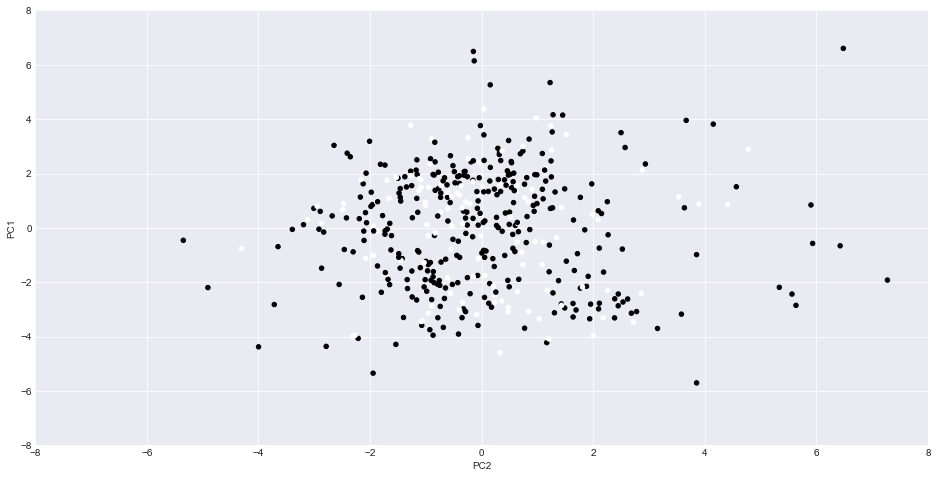

In [56]:
data_fs_pca_tf_df.plot(kind='scatter',x='PC2',y='PC1',c=data_original['Region']==3,figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid') # 黒プロットがRegion3である。

In [57]:
data_fs_pca_tf_df.groupby(['Region','Channel']).count()

PC1  PC2
Region Channel          
1      1         59   59
       2         18   18
2      1         28   28
       2         19   19
3      1        211  211
       2        105  105

In [58]:
data_original.groupby(['Region','Channel']).sum()

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
1      1         761233   228342   237542  184512             56081   
       2          93600   194112   332495   46514            148055   
2      1         326215    64519   123074  160861             13516   
       2         138506   174625   310200   29271            159795   
3      1        2928269   735753   820101  771606            165990   
       2        1032308  1153006  1675150  158886            724420   

                Delicassen  
Region Channel              
1      1             70632  
       2             33695  
2      1             30965  
       2             23541  
3      1            320358  
       2            191752

In [59]:
data_original.groupby(['Region','Channel']).mean()

Fresh          Milk       Grocery       Frozen  \
Region Channel                                                          
1      1        12902.254237   3870.203390   4026.135593  3127.322034   
       2         5200.000000  10784.000000  18471.944444  2584.111111   
2      1        11650.535714   2304.250000   4395.500000  5745.035714   
       2         7289.789474   9190.789474  16326.315789  1540.578947   
3      1        13878.052133   3486.981043   3886.734597  3656.900474   
       2         9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Region Channel                                 
1      1              950.525424  1197.152542  
       2             8225.277778  1871.944444  
2      1              482.714286  1105.892857  
       2             8410.263158  1239.000000  
3      1              786.682464  1518.284360  
       2             6899.238095  1826.209524

## （２）＜Cluster ０についての考察＞

In [60]:
data_cluster_0=data_fs_pca_tf_df[data_fs['cluster']==0]
data_cluster_0_ch_1=data_cluster_0[data_cluster_0['Channel']==1]
data_cluster_0_ch_1

,PC1,PC2,Channel,Region
51,-0.949999,1.717607,1,3
66,-1.921168,7.273268,1,3
95,-0.572077,5.932914,1,3
128,-0.659847,6.425845,1,3
137,-0.255752,2.267220,1,3
167,-0.633505,1.215090,1,3
172,-1.783800,1.909809,1,3
182,-2.617771,2.617388,1,3
184,0.842424,5.902178,1,3
187,-0.780605,2.522430,1,3


In [61]:
data_cluster_0.groupby(['Channel','Region']).count()

PC1  PC2
Channel Region          
1       1         4    4
        3        14   14
2       1         5    5
        2         6    6
        3        30   30

In [62]:
data_cluster_0.describe()

,PC1,PC2,Channel,Region
count,59.000000,59.000000,59.000000,59.00000
mean,-2.259957,2.544372,1.694915,2.59322
std,1.282822,1.508135,0.464396,0.74553
min,-5.704023,0.844530,1.000000,1.00000
25%,-3.073078,1.504115,1.000000,2.50000
50%,-2.436109,2.109050,2.000000,3.00000
75%,-1.593009,2.748645,2.000000,3.00000
max,0.875996,7.273268,2.000000,3.00000


In [63]:
data_cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 16 to 420
Data columns (total 4 columns):
PC1        59 non-null float64
PC2        59 non-null float64
Channel    59 non-null int64
Region     59 non-null int64
dtypes: float64(2), int64(2)
memory usage: 2.3 KB


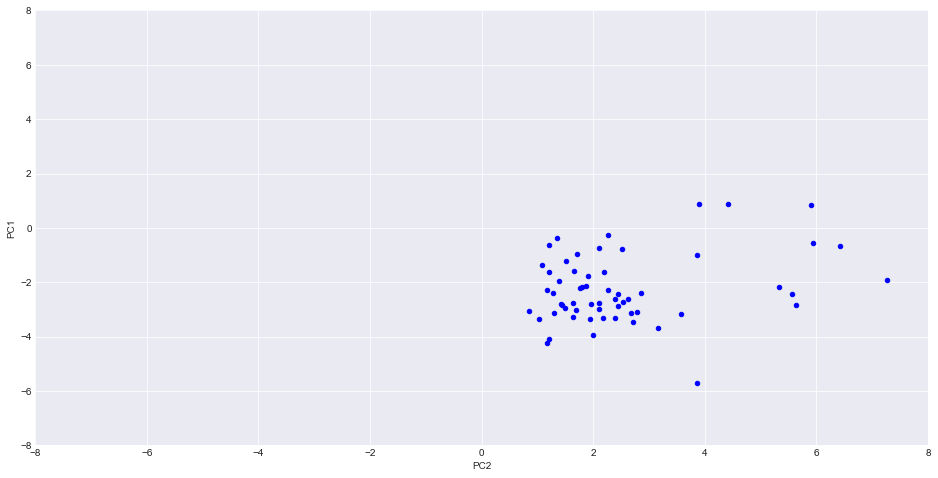

In [64]:
data_cluster_0.plot(kind='scatter',x='PC2',y='PC1',c='b',marker='o',figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')

In [65]:
df_clu_0=DataFrame(data_original, index=data_cluster_0.index)
df_clu_0

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
16,2,3,1020,8816,12121,134,4508,1080
25,2,3,16165,4230,7595,201,4003,57
35,2,3,688,5491,11091,833,4239,436
38,2,3,4591,15729,16709,33,6956,433
42,2,3,10850,7555,14961,188,6899,46
43,2,3,630,11095,23998,787,9529,72
44,2,3,9670,7027,10471,541,4618,65
51,1,3,3347,4051,6996,239,1538,301
53,2,3,491,10473,11532,744,5611,224
57,2,3,5417,9933,10487,38,7572,1282


In [66]:
df_clu_0.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,59.000000,59.00000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1.694915,2.59322,2118.677966,7755.186441,13328.203390,599.745763,5834.898305,746.440678
std,0.464396,0.74553,3012.799920,5026.796188,8203.110474,906.285857,4347.927872,1198.565468
min,1.000000,1.00000,3.000000,685.000000,2216.000000,25.000000,223.000000,3.000000
25%,1.000000,2.50000,257.500000,4140.500000,7986.000000,139.500000,3463.500000,91.000000
50%,2.000000,3.00000,964.000000,7460.000000,11323.000000,364.000000,5038.000000,303.000000
75%,2.000000,3.00000,2570.000000,9193.500000,16077.000000,765.500000,7143.000000,943.000000
max,2.000000,3.00000,16165.000000,25862.000000,45828.000000,6269.000000,24231.000000,6372.000000


In [67]:
df_clu_0.groupby(['Channel','Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1           4     4        4       4                 4           4
        3          14    14       14      14                14          14
2       1           5     5        5       5                 5           5
        2           6     6        6       6                 6           6
        3          30    30       30      30                30          30

### 「Channel２かつRegion３のルート」及び「Channel１かつRegion３のルート」の件数が多い。

In [68]:
df_clu_0.groupby(['Channel','Region']).sum()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                              
1       1        8781   19552    19002    2715              6746         559
        3       19932   68790   107506   10055             40458        5732
2       1        7271   50230    96821    5426             38666        9141
        2        8944   53781    89978    5011             55963        4183
        3       80074  265203   473057   12178            202426       24425

In [69]:
dframe_clu_0=df_clu_0.groupby(['Channel','Region']).mean()
dframe_clu_0

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                         
1       1       2195.250000   4888.000000   4750.500000   678.750000   
        3       1423.714286   4913.571429   7679.000000   718.214286   
2       1       1454.200000  10046.000000  19364.200000  1085.200000   
        2       1490.666667   8963.500000  14996.333333   835.166667   
        3       2669.133333   8840.100000  15768.566667   405.933333   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1            1686.500000   139.750000  
        3            2889.857143   409.428571  
2       1            7733.200000  1828.200000  
        2            9327.166667   697.166667  
        3            6747.533333   814.166667

### ＜Cluster０についての考察結果の報告＞

### 販売単価を高く設定できる順に販売ルートを考える、という前提を置いて、以下考察する。すなわち、原価水準（若しくは利益水準）は考慮せずに、売上高を伸ばす戦略だけにターゲットを絞って検討し、また、物流費なども考慮せずに、遠隔地でも売上高を伸ばせるものを優先するように検討している。
### ①Freshは、「Channel２かつRegion２」及び「Channel１かつRegion１」の販売ルートを強化すべきである。
### ②Milkは、「Channel２かつRegion１」及び「Channel１かつRegion１」の販売ルートを強化すべきである。
### ③Groceryは、「Channel２かつRegion１」の販売ルートを強化すべきである。
### ④Frozenは、「Channel２かつRegion３」のルートから「Channel２かつRegion１」の販売ルートに変更し、かつ、「Channel１かつRegion３」のルートから「Channel１かつRegion１or２」の販売ルートに変更すべきである。
### ⑤Detergents_Paperは、「Channel２かつRegion３」のルートから「Channel２かつRegion２」の販売ルートに変更すべきである。
### ⑥Delicassenは、「Channel２かつRegion３」のルートから「Channel２かつRegion１」の販売ルートに変更し、かつ、「Channel１かつRegion３」のルートから「Channel１かつRegion２」の販売ルートに変更すべきである。

### 以上の結果、Fresh、Milk、Groceryについては、既存の販売ルートの他にも、上記①、②、③の他の販売ルートの開拓を検討すべきである。Frozen、Detergents_Paper、Delicassenについては、既存の販売ルートにおける値上げ要請の交渉を行い、難航した場合には、上記④、⑤、⑥の他の販売ルートの開拓を検討すべきである。

In [70]:
data_cluster_0_ch_1=data_cluster_0[data_cluster_0['Channel']==1]
data_cluster_0_ch_1

,PC1,PC2,Channel,Region
51,-0.949999,1.717607,1,3
66,-1.921168,7.273268,1,3
95,-0.572077,5.932914,1,3
128,-0.659847,6.425845,1,3
137,-0.255752,2.267220,1,3
167,-0.633505,1.215090,1,3
172,-1.783800,1.909809,1,3
182,-2.617771,2.617388,1,3
184,0.842424,5.902178,1,3
187,-0.780605,2.522430,1,3


In [71]:
data_cluster_0_ch_2=data_cluster_0[data_cluster_0['Channel']==2]
data_cluster_0_ch_2

,PC1,PC2,Channel,Region
16,-2.805136,1.953226,2,3
25,-1.225093,1.518487,2,3
35,-2.150376,1.879878,2,3
38,-3.346129,1.937390,2,3
42,-2.216462,1.769491,2,3
43,-3.138356,2.684167,2,3
44,-1.616149,1.210015,2,3
53,-2.610372,2.386258,2,3
57,-3.125598,1.305385,2,3
60,-1.569869,1.662293,2,3


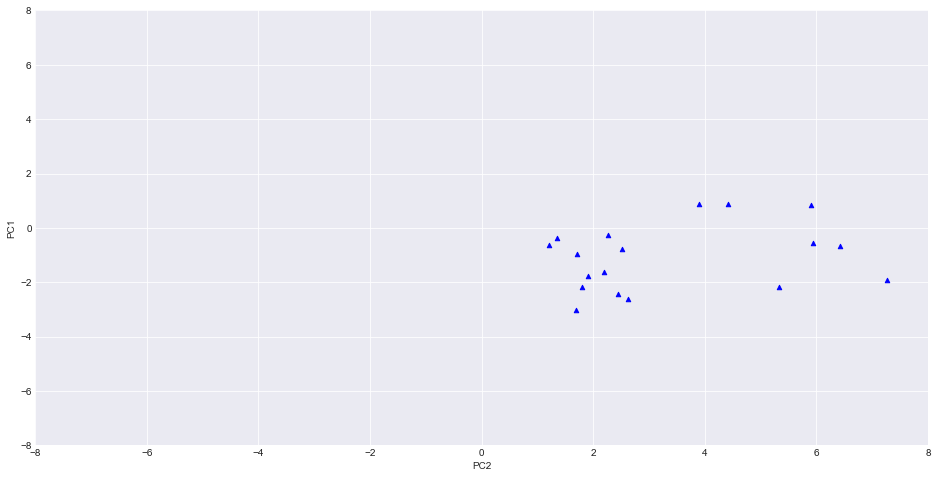

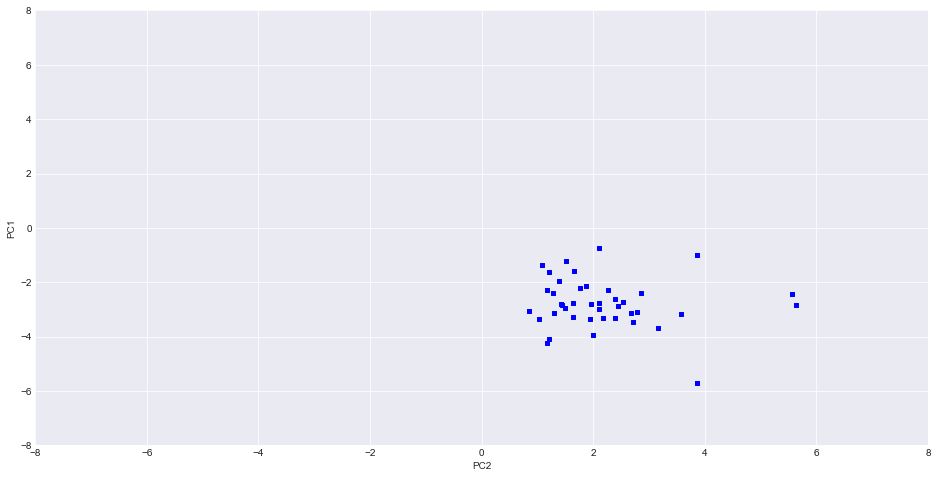

In [72]:
data_cluster_0_ch_1.plot(kind='scatter',x='PC2',y='PC1',c='b',marker='^',figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')
data_cluster_0_ch_2.plot(kind='scatter',x='PC2',y='PC1',c='b',marker='s',figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')

In [73]:
data_cluster_0_re_1=data_cluster_0[data_cluster_0['Region']==1]
data_cluster_0_re_1

,PC1,PC2,Channel,Region
203,0.862883,4.410326,1,1
205,-3.341808,1.030659,2,1
207,-1.351159,1.082398,2,1
216,-4.084215,1.204821,2,1
218,-3.468187,2.719864,2,1
221,-2.175789,1.807874,1,1
233,0.875996,3.894888,1,1
235,-0.362534,1.343348,1,1
264,-3.313086,2.177903,2,1


In [74]:
data_cluster_0_re_2=data_cluster_0[data_cluster_0['Region']==2]
data_cluster_0_re_2

,PC1,PC2,Channel,Region
302,-2.296951,1.176450,2,2
303,-2.299485,2.258609,2,2
304,-3.958042,2.001509,2,2
305,-2.405118,2.863023,2,2
309,-3.066389,0.844530,2,2
312,-2.850248,1.433972,2,2


In [75]:
data_cluster_0_re_3=data_cluster_0[data_cluster_0['Region']==3]
data_cluster_0_re_3

,PC1,PC2,Channel,Region
16,-2.805136,1.953226,2,3
25,-1.225093,1.518487,2,3
35,-2.150376,1.879878,2,3
38,-3.346129,1.937390,2,3
42,-2.216462,1.769491,2,3
43,-3.138356,2.684167,2,3
44,-1.616149,1.210015,2,3
51,-0.949999,1.717607,1,3
53,-2.610372,2.386258,2,3
57,-3.125598,1.305385,2,3


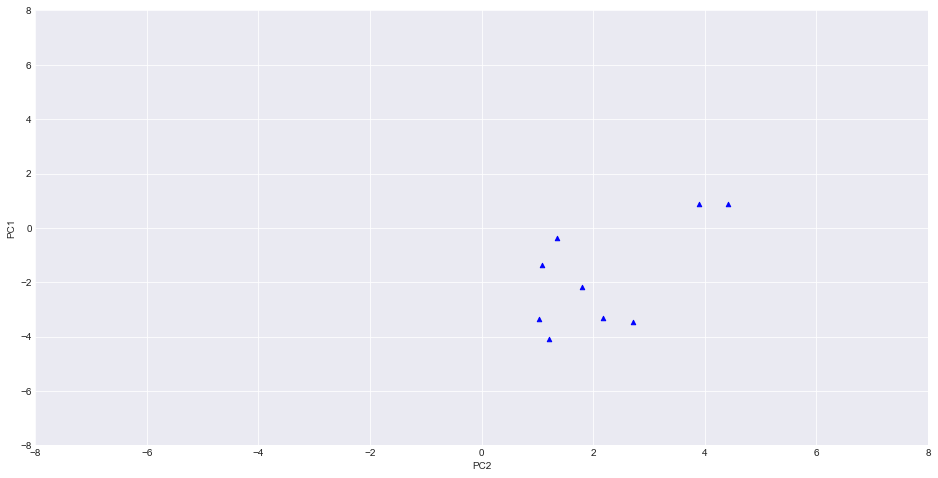

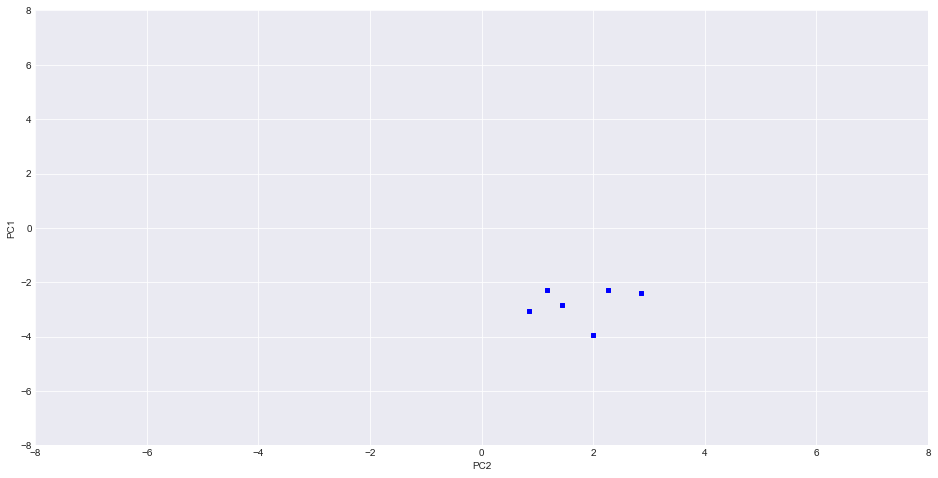

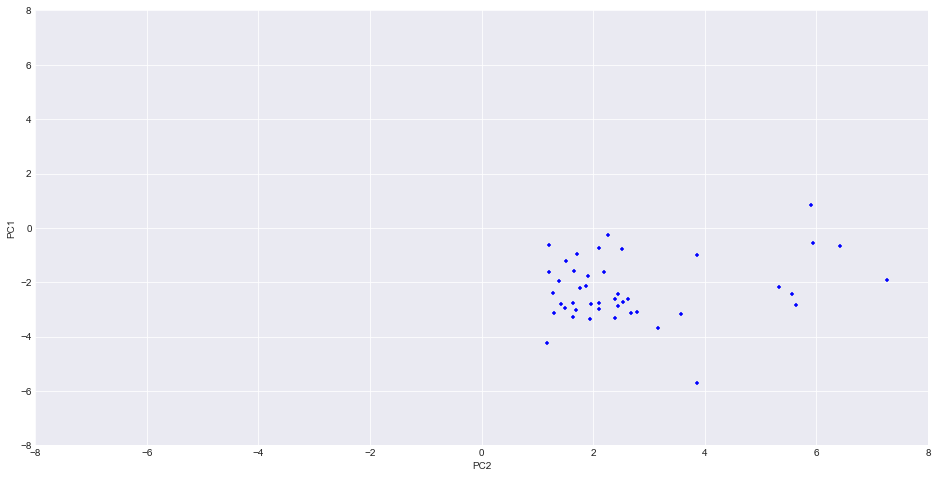

In [76]:
data_cluster_0_re_1.plot(kind='scatter',x='PC2',y='PC1',c='b',marker='^',figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')
data_cluster_0_re_2.plot(kind='scatter',x='PC2',y='PC1',c='b',marker='s',figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')
data_cluster_0_re_3.plot(kind='scatter',x='PC2',y='PC1',c='b',marker='+',figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')

## （３）＜Cluster１についての考察＞

In [77]:
data_cluster_1=data_fs_pca_tf_df[data_fs['cluster']==1]
data_cluster_1

,PC1,PC2,Channel,Region
3,1.127313,-1.457982,1,3
4,-0.796711,-2.460866,2,3
17,0.252570,-0.604494,1,3
22,-0.154939,-2.829920,1,3
29,0.573919,-1.143756,1,3
31,0.009802,0.297081,1,3
33,0.790571,-1.983227,1,3
36,-0.119070,-2.111855,1,3
39,3.035751,-2.645126,1,3
40,-0.048247,-2.914624,1,3


In [78]:
data_cluster_1.describe()

,PC1,PC2,Channel,Region
count,114.000000,114.000000,114.000000,114.000000
mean,0.843289,-1.417938,1.052632,2.500000
std,0.868507,1.028419,0.224283,0.778585
min,-1.117387,-5.345859,1.000000,1.000000
25%,0.153197,-2.067822,1.000000,2.000000
50%,0.794192,-1.308944,1.000000,3.000000
75%,1.502072,-0.631019,1.000000,3.000000
max,3.184892,0.659882,2.000000,3.000000


In [79]:
data_cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 3 to 436
Data columns (total 4 columns):
PC1        114 non-null float64
PC2        114 non-null float64
Channel    114 non-null int64
Region     114 non-null int64
dtypes: float64(2), int64(2)
memory usage: 4.5 KB


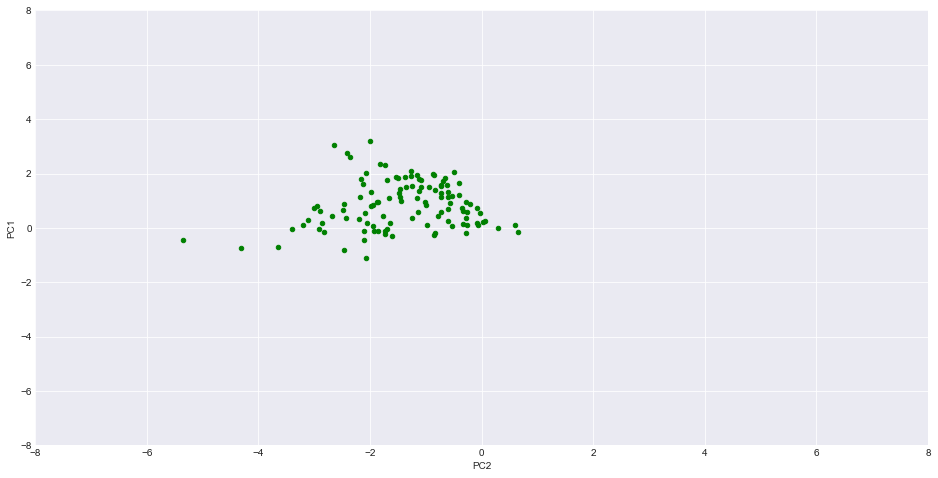

In [80]:
data_cluster_1.plot(kind='scatter',x='PC2',y='PC1',c='g',marker='o',figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')

In [81]:
df_clu_1=DataFrame(data_original, index=data_cluster_1.index)
df_clu_1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
17,1,3,5876,6157,2933,839,370,4478
22,1,3,31276,1917,4469,9408,2381,4334
29,1,3,43088,2100,2609,1200,1107,823
31,1,3,2612,4339,3133,2088,820,985
33,1,3,29729,4786,7326,6130,361,1083
36,1,3,29955,4362,5428,1729,862,4626
39,1,3,56159,555,902,10002,212,2916
40,1,3,24025,4332,4757,9510,1145,5864


In [82]:
df_clu_1.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,1.052632,2.500000,20307.929825,4282.464912,4436.798246,6995.236842,656.763158,2306.307018
std,0.224283,0.778585,14973.234484,5428.872145,3298.168398,7614.499677,503.314489,4674.176138
min,1.000000,1.000000,717.000000,555.000000,699.000000,660.000000,71.000000,117.000000
25%,1.000000,2.000000,9167.000000,1888.000000,2419.750000,2788.500000,315.250000,874.500000
50%,1.000000,3.000000,17696.500000,2785.500000,3414.500000,5185.000000,532.500000,1362.500000
75%,1.000000,3.000000,26975.250000,4584.000000,5331.500000,8571.250000,845.000000,2482.250000
max,2.000000,3.000000,76237.000000,43950.000000,20170.000000,60869.000000,3593.000000,47943.000000


In [83]:
df_clu_1.groupby(['Channel','Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1          18    18       18      18                18          18
        2          16    16       16      16                16          16
        3          74    74       74      74                74          74
2       1           2     2        2       2                 2           2
        2           1     1        1       1                 1           1
        3           3     3        3       3                 3           3

### 「Channel１かつRegion３のルート」の件数が多く、かつ、全般的に「Channel１のルート」の件数が多い。

In [84]:
df_clu_1.groupby(['Channel','Region']).sum()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                                
1       1        394991   81896    83732  106093             13812       37672
        2        254828   45526    78410  128364              8586       22915
        3       1552407  336649   309164  524097             47334      187281
2       1         13862    8516    10880   13933              1743        3497
        2         16823     928     2743   11559               332        3486
        3         82193   14686    20866   13411              3064        8068

In [85]:
dframe_clu_1=df_clu_1.groupby(['Channel','Region']).mean()
dframe_clu_1

Fresh         Milk      Grocery        Frozen  \
Channel Region                                                         
1       1       21943.944444  4549.777778  4651.777778   5894.055556   
        2       15926.750000  2845.375000  4900.625000   8022.750000   
        3       20978.472973  4549.310811  4177.891892   7082.391892   
2       1        6931.000000  4258.000000  5440.000000   6966.500000   
        2       16823.000000   928.000000  2743.000000  11559.000000   
        3       27397.666667  4895.333333  6955.333333   4470.333333   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             767.333333  2092.888889  
        2             536.625000  1432.187500  
        3             639.648649  2530.824324  
2       1             871.500000  1748.500000  
        2             332.000000  3486.000000  
        3            1021.333333  2689.333333

### ＜Cluster1についての考察結果の報告＞

### 販売単価を高く設定できる順に販売ルートを考える、という前提を置いて、以下考察する。すなわち、原価水準（若しくは利益水準）は考慮せずに、売上高を伸ばす戦略だけにターゲットを絞って検討し、また、物流費なども考慮せずに、遠隔地でも売上高を伸ばせるものを優先するように検討している。
### ①Freshは、「Channel１かつRegion１」及び「Channel２かつRegion３」の販売ルートを強化すべきである。
### ②Milkは、「Channel１かつRegion１」及び「Channel２かつRegion３」の販売ルートを強化すべきである。
### ③Groceryは、「Channel１かつRegion３」の販売ルートから「Channel１かつRegion１or２」の販売ルート及び「Channel２かつRegion３or１」の販売ルートに変更すべきである。
### ④Frozenは、「Channel１かつRegion３」のルートから「Channel１かつRegion２」の販売ルートに変更し、かつ、「Channel２かつRegion２」の販売ルートを強化すべきである。
### ⑤Detergents_Paperは、「Channel１かつRegion３」のルートから「Channel１かつRegion１」の販売ルートに変更し、かつ、「Channel２かつRegion３or１」の販売ルートを強化すべきである。
### ⑥Delicassenは、「Channel２かつRegion２」の販売ルートを強化すべきである。

### 以上の結果、Fresh、Milk、Delicassenについては、既存の販売ルートの他にも、上記①、②、⑥の他の販売ルートの開拓を検討すべきである。Grocery、Frozen、Detergents_Paperについては、既存の販売ルートにおける値上げ要請の交渉を行い、難航した場合には、上記③、④、⑤の他の販売ルートの開拓を検討すべきである。

## （４）＜Cluster ２についての考察＞

In [86]:
data_cluster_2=data_fs_pca_tf_df[data_fs['cluster']==2]
data_cluster_2

,PC1,PC2,Channel,Region
0,-1.750985,-0.070515,2,3
1,-1.800365,-0.869754,2,3
2,-1.893736,-1.676621,2,3
5,-1.083824,-0.392942,2,3
6,-1.132610,0.201602,2,3
7,-1.582474,-0.968196,2,3
8,-0.871825,0.596759,1,3
9,-2.888883,-0.741103,2,3
10,-2.116168,-0.748845,2,3
12,-2.232595,-1.327828,2,3


In [87]:
data_cluster_2.describe()

,PC1,PC2,Channel,Region
count,124.000000,124.000000,124.000000,124.000000
mean,-2.076294,-0.717226,1.758065,2.564516
std,1.098210,1.024180,0.429993,0.756994
min,-5.345865,-4.904846,1.000000,1.000000
25%,-2.786020,-1.184162,2.000000,2.000000
50%,-1.977736,-0.706415,2.000000,3.000000
75%,-1.147992,0.052621,2.000000,3.000000
max,-0.239926,1.100084,2.000000,3.000000


In [88]:
data_cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 437
Data columns (total 4 columns):
PC1        124 non-null float64
PC2        124 non-null float64
Channel    124 non-null int64
Region     124 non-null int64
dtypes: float64(2), int64(2)
memory usage: 4.8 KB


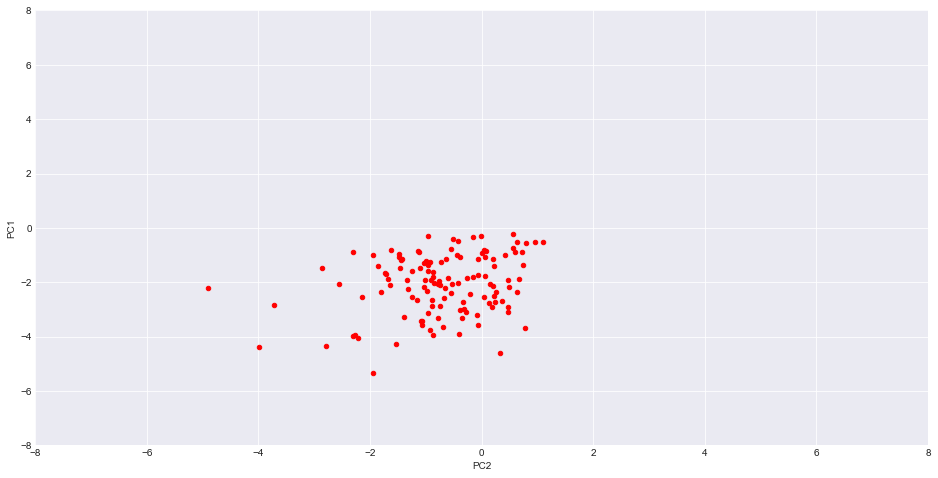

In [89]:
data_cluster_2.plot(kind='scatter',x='PC2',y='PC1',c='r',marker='o',figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')

In [90]:
df_clu_2=DataFrame(data_original, index=data_cluster_2.index)
df_clu_2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098
10,2,3,3366,5403,12974,4400,5977,1744
12,2,3,31714,12319,11757,287,3881,2931


In [91]:
df_clu_2.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,1.758065,2.564516,11754.088710,10635.879032,15136.556452,1898.935484,6479.322581,2149.362903
std,0.429993,0.756994,12622.047742,10318.560716,12733.330302,1966.271705,6501.336419,2274.972453
min,1.000000,1.000000,572.000000,944.000000,2223.000000,42.000000,363.000000,120.000000
25%,2.000000,2.000000,4597.500000,5342.750000,7682.250000,860.000000,2643.250000,948.750000
50%,2.000000,3.000000,8223.500000,7621.000000,11301.000000,1311.000000,4380.500000,1631.000000
75%,2.000000,3.000000,15740.500000,11698.500000,18732.500000,2488.250000,7371.000000,2563.750000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,16745.000000,40827.000000,16523.000000


In [92]:
df_clu_2.groupby(['Channel','Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1           9     9        9       9                 9           9
        2           2     2        2       2                 2           2
        3          19    19       19      19                19          19
2       1          11    11       11      11                11          11
        2          12    12       12      12                12          12
        3          71    71       71      71                71          71

### 「Channel１かつRegion３のルート」の件数が多い。

In [93]:
df_clu_2.groupby(['Channel','Region']).sum()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                               
1       1        69474   70192    76399   17187             24365       14334
        2        14542    4032    17707    1893              2500        2210
        3       331390  117350   163850   44655             47044       54286
2       1        72467  135366   224794   27155            107646       21057
        2       112739  119916   217479   12701            103500       15872
        3       856895  871993  1176704  131877            518381      158762

In [94]:
dframe_clu_2=df_clu_2.groupby(['Channel','Region']).mean()
dframe_clu_2

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1        7719.333333   7799.111111   8488.777778  1909.666667   
        2        7271.000000   2016.000000   8853.500000   946.500000   
        3       17441.578947   6176.315789   8623.684211  2350.263158   
2       1        6587.909091  12306.000000  20435.818182  2468.636364   
        2        9394.916667   9993.000000  18123.250000  1058.416667   
        3       12068.943662  12281.591549  16573.295775  1857.422535   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1            2707.222222  1592.666667  
        2            1250.000000  1105.000000  
        3            2476.000000  2857.157895  
2       1            9786.000000  1914.272727  
        2            8625.000000  1322.666667  
        3            7301.140845  2236.084507

### ＜Cluster２についての考察結果の報告＞

### 販売単価を高く設定できる順に販売ルートを考える、という前提を置いて、以下考察する。すなわち、原価水準（若しくは利益水準）は考慮せずに、売上高を伸ばす戦略だけにターゲットを絞って検討し、また、物流費なども考慮せずに、遠隔地でも売上高を伸ばせるものを優先するように検討している。
### ①Freshは、「Channel２」の販売ルートを開拓すべきである。
### ②Milkは、特にコメントは無い。
### ③Groceryは、「Channel１」であれば「Region２」の販売ルートを強化すべきであり、かつ、「Channel２」の販売ルートを開拓すべきである。
### ④Frozenは、「Channel１かつRegion３」のルートから「Channel１かつRegion２」の販売ルートに変更すべきである。
### ⑤Detergents_Paperは、「Channel１かつRegion３」のルートから「Channel１かつRegion１」の販売ルートに変更し、かつ、「Channel２」の販売ルートを開拓すべきである。
### ⑥Delicassenは、特にコメントは無い。
### 以上の結果、Fresh、Grocery、Detergents_Paperについては、既存の販売ルートの他にも、上記①、③、⑤の他の販売ルートの開拓を検討すべきである。Frozenについては、既存の販売ルートにおける値上げ要請の交渉を行い、難航した場合には、上記④の他の販売ルートの開拓を検討すべきである。

## （５）＜Cluster ３についての考察＞

In [95]:
data_cluster_3=data_fs_pca_tf_df[data_fs['cluster']==3]
data_cluster_3

,PC1,PC2,Channel,Region
11,0.991451,-0.062701,2,3
15,0.417284,0.814299,1,3
21,1.724718,0.147341,1,3
26,1.882829,-0.428675,1,3
27,2.396603,0.537053,1,3
32,0.578220,0.501011,1,3
34,0.628386,2.090546,1,3
58,1.765477,0.411154,1,3
69,1.067748,1.102345,1,3
75,8.366482,-0.535280,1,3


In [96]:
data_cluster_3.describe()

,PC1,PC2,Channel,Region
count,143.000000,143.000000,143.000000,143.000000
mean,2.060581,0.702538,1.006993,2.538462
std,1.380514,1.192161,0.083624,0.802893
min,-0.125847,-1.270062,1.000000,1.000000
25%,1.226963,-0.027367,1.000000,2.000000
50%,1.882240,0.501011,1.000000,3.000000
75%,2.676965,1.137858,1.000000,3.000000
max,8.366482,6.481978,2.000000,3.000000


In [97]:
data_cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 11 to 439
Data columns (total 4 columns):
PC1        143 non-null float64
PC2        143 non-null float64
Channel    143 non-null int64
Region     143 non-null int64
dtypes: float64(2), int64(2)
memory usage: 5.6 KB


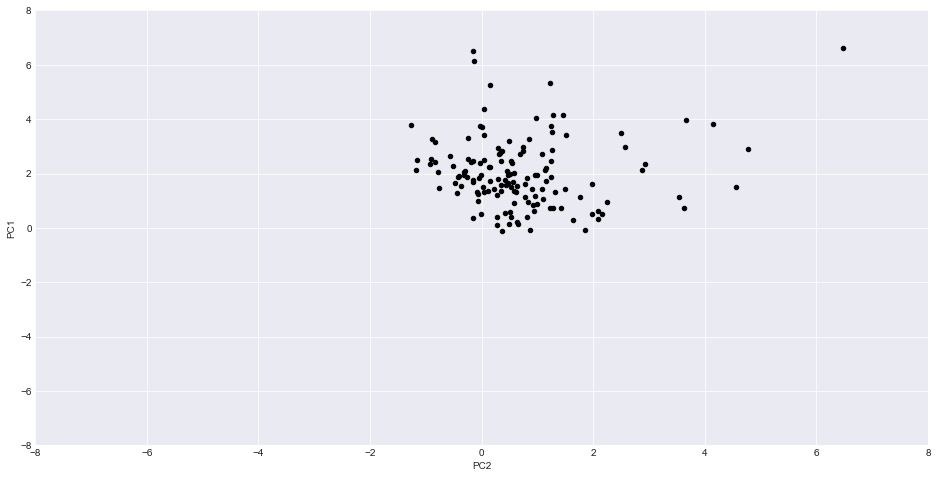

In [98]:
data_cluster_3.plot(kind='scatter',x='PC2',y='PC1',c='k',marker='o',figsize=(16,8))
plt.xlim(-8,8);
plt.ylim(-8,8);
plt.style.use('seaborn-darkgrid')

In [99]:
df_clu_3=DataFrame(data_original, index=data_cluster_3.index)
df_clu_3

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
11,2,3,13146,1124,4523,1420,549,497
15,1,3,10253,1114,3821,397,964,412
21,1,3,5567,871,2010,3383,375,569
26,1,3,9898,961,2861,3151,242,833
27,1,3,14276,803,3045,485,100,518
32,1,3,21632,1318,2886,266,918,405
34,1,3,1502,1979,2262,425,483,395
58,1,3,13779,1970,1648,596,227,436
69,1,3,8352,2820,1293,779,656,144
75,1,3,20398,1137,3,4407,3,975


In [100]:
df_clu_3.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1.006993,2.538462,9667.958042,1998.258741,2303.986014,1981.398601,316.720280,681.559441
std,0.083624,0.802893,8537.022659,1995.540171,1866.730591,2396.154534,466.737031,576.674276
min,1.000000,1.000000,3.000000,55.000000,3.000000,47.000000,3.000000,3.000000
25%,1.000000,2.000000,3397.000000,856.500000,1294.500000,617.500000,89.000000,296.500000
50%,1.000000,3.000000,7769.000000,1289.000000,1997.000000,1173.000000,212.000000,522.000000
75%,1.000000,3.000000,12596.500000,2268.000000,2873.500000,2453.000000,381.000000,948.000000
max,2.000000,3.000000,42786.000000,13252.000000,16483.000000,16919.000000,4762.000000,3271.000000


In [101]:
df_clu_3.groupby(['Channel','Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1          28    28       28      28                28          28
        2          10    10       10      10                10          10
        3         104   104      104     104               104         104
2       3           1     1        1       1                 1           1

### 「Channel２かつRegion３の販売ルート」の件数が多い。

In [102]:
df_clu_3.groupby(['Channel','Region']).sum()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                                
1       1        287987   56702    58409   58517             11158       18067
        2         56845   14961    26957   30604              2430        5840
        3       1024540  212964   239581  192799             31154       73059
2       3         13146    1124     4523    1420               549         497

In [103]:
dframe_clu_3=df_clu_3.groupby(['Channel','Region']).mean()
dframe_clu_3

Fresh         Milk      Grocery       Frozen  \
Channel Region                                                        
1       1       10285.250000  2025.071429  2086.035714  2089.892857   
        2        5684.500000  1496.100000  2695.700000  3060.400000   
        3        9851.346154  2047.730769  2303.663462  1853.836538   
2       3       13146.000000  1124.000000  4523.000000  1420.000000   

                Detergents_Paper  Delicassen  
Channel Region                                
1       1             398.500000  645.250000  
        2             243.000000  584.000000  
        3             299.557692  702.490385  
2       3             549.000000  497.000000

### ＜Cluster３についての考察結果の報告＞

### 販売単価を高く設定できる順に販売ルートを考える、という前提を置いて、以下考察する。すなわち、原価水準（若しくは利益水準）は考慮せずに、売上高を伸ばす戦略だけにターゲットを絞って検討し、また、物流費なども考慮せずに、遠隔地でも売上高を伸ばせるものを優先するように検討している。
### ①Freshは、「Channel１かつRegion３」の販売ルートを強化すべきである。
### ②Milkは、「Channel１かつRegion３」のルートから「Channel１かつRegion１」の販売ルートに変更し、かつ「Channel２かつRegion１」の販売ルートを強化すべきすべきである。
### ③Groceryは、「Channel２かつRegion３」のルートから「Channel２かつRegion１or２」の販売ルートに変更すべきである。
### ④Frozenは、「Channel２かつRegion３」のルートから「Channel２かつRegion１」の販売ルートに変更すべきである。
### ⑤Detergents_Paperは、「Channel２かつRegion３」のルートから「Channel２かつRegion１」の販売ルートに変更し、かつ、「Channel１」の販売ルートの販売単価を見直すべきである。
### ⑥Delicassenは、「Channel１かつRegion３」の販売ルートを強化すべきすべきである。
### 以上の結果、Fresh、Delicassenについては、既存の販売ルートの他にも、上記①、⑥の他の販売ルートの強化を検討すべきである。Milk、Grocery、Frozen、Detergents_Paperについては、既存の販売ルートにおける値上げ要請の交渉を行い、難航した場合には、上記②、③、④、⑤の他の販売ルートの開拓を検討すべきである。

## （６）＜各クラスタ間における分析＞

In [104]:
# 平均販売単価のクラスタ毎の比較表（上から順にクラスタ０〜３）
dframe_clu_con=pd.concat([dframe_clu_0, dframe_clu_1,dframe_clu_2,dframe_clu_3])
dframe_clu_con

Fresh          Milk       Grocery        Frozen  \
Channel Region                                                           
1       1        2195.250000   4888.000000   4750.500000    678.750000   
        3        1423.714286   4913.571429   7679.000000    718.214286   
2       1        1454.200000  10046.000000  19364.200000   1085.200000   
        2        1490.666667   8963.500000  14996.333333    835.166667   
        3        2669.133333   8840.100000  15768.566667    405.933333   
1       1       21943.944444   4549.777778   4651.777778   5894.055556   
        2       15926.750000   2845.375000   4900.625000   8022.750000   
        3       20978.472973   4549.310811   4177.891892   7082.391892   
2       1        6931.000000   4258.000000   5440.000000   6966.500000   
        2       16823.000000    928.000000   2743.000000  11559.000000   
        3       27397.666667   4895.333333   6955.333333   4470.333333   
1       1        7719.333333   7799.111111   8488.777778   1909.666667   
        2        7271.000000   2016.000000   8853.500000    946.500000   
        3       17441.578947   6176.315789   8623.684211   2350.263158   
2       1        6587.909091  12306.000000  20435.818182   2468.636364   
        2        9394.916667   9993.000000  18123.250000   1058.416667   
        3       12068.943662  12281.591549  16573.295775   1857.422535   
1       1       10285.250000   2025.071429   2086.035714   2089.892857   
        2        5684.500000   1496.100000   2695.700000   3060.400000   
        3        9851.346154   2047.730769   2303.663462   1853.836538   
2       3       13146.000000   1124.000000   4523.000000   1420.000000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1            1686.500000   139.750000  
        3            2889.857143   409.428571  
2       1            7733.200000  1828.200000  
        2            9327.166667   697.166667  
        3            6747.533333   814.166667  
1       1             767.333333  2092.888889  
        2             536.625000  1432.187500  
        3             639.648649  2530.824324  
2       1             871.500000  1748.500000  
        2             332.000000  3486.000000  
        3            1021.333333  2689.333333  
1       1            2707.222222  1592.666667  
        2            1250.000000  1105.000000  
        3            2476.000000  2857.157895  
2       1            9786.000000  1914.272727  
        2            8625.000000  1322.666667  
        3            7301.140845  2236.084507  
1       1             398.500000   645.250000  
        2             243.000000   584.000000  
        3             299.557692   702.490385  
2       3             549.000000   497.000000

### ＜各クラスタ間についての分析結果＞

### ①Freshについては、クラスタ１の販売状況を模範にして、他のクラスタにおける販売活動方法を見直すべきである。特に、クラスタ０における販売活動は早急に改善を要する。
### ②Milkについては、クラスタ３の販売状況を模範にして、他のクラスタにおける販売活動方法を見直すべきである。特に、クラスタ２における販売活動は早急に改善を要する。
### ③Groceryについては、クラスタ３の販売状況を模範にして、他のクラスタにおける販売活動方法を見直すべきである。特に、クラスタ２における販売活動は早急に改善を要する。
### ④Frozenについては、クラスタ１の販売状況を模範にして、他のクラスタにおける販売活動方法を見直すべきである。特に、クラスタ０における販売活動は早急に改善を要する。
### ⑤Detergents_Paperについては、クラスタ３の販売状況を模範にして、他のクラスタにおける販売活動方法を見直すべきである。特に、クラスタ２における販売活動は早急に改善を要する。
### ⑥Delicassenについては、クラスタ３の販売状況を模範にして、他のクラスタにおける販売活動方法を見直すべきである。特に、クラスタ２における販売活動は早急に改善を要する。


## ９　アルゴリズムスクラッチ

## （１）k-means

### iris datasetを使って、k-meansのアルゴリズムをスクラッチで実装した。（出典：侍エンジニア塾「k-meansクラスタリングをPython/NumPyで最初から実装する方法を解説」）

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [106]:
iris = datasets.load_iris()       # irisを読み込む関数
df = pd.DataFrame(        
    iris.data,                    # データフレームの要素
    columns = iris.feature_names  # 各列の名前に特徴名を使う
)
df["label"] = iris.target         # わかりやすくするためにlabel列を追加、ここにクラス番号を入れておきます。
 
df.head()                         # データフレームの先頭5行を表示してみましょう。

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [107]:
# 今回はDataFrameではなく、もっと単純なデータ構造が使いたいのでnp.arrayに変換しておきます（このときラベルの列は除外します）。

input_data = df.iloc[:,:-1].values # インスタンス属性valuesにアクセスすると、np.arrayが取得できます。

In [108]:
def kmeans(k, X, max_iter=300):
    X_size,n_features = X.shape
    
    # ランダムに重心の初期値を初期化
    centroids  = X[np.random.choice(X_size,k)]
    
    # 前の重心と比較するために、仮に新しい重心を入れておく配列を用意
    new_centroids = np.zeros((k, n_features))
    
    # 各データ所属クラスタ情報を保存する配列を用意
    cluster = np.zeros(X_size)
    
    # ループ上限回数まで繰り返し
    for epoch in range(max_iter):
        
        # 入力データ全てに対して繰り返し
        for i in range(X_size):
            
            # データから各重心までの距離を計算（ルートを取らなくても大小関係は変わらないので省略）
            distances = np.sum((centroids - X[i]) ** 2, axis=1)
            
            # データの所属クラスタを距離の一番近い重心を持つものに更新
            cluster[i] = np.argsort(distances)[0]
            
        # すべてのクラスタに対して重心を再計算
        for j in range(k):
            new_centroids[j] = X[cluster==j].mean(axis=0)
            
        # もしも重心が変わっていなかったら終了
        if np.sum(new_centroids == centroids) == k:
            print("break")
            break
        centroids =  new_centroids
    return cluster

In [109]:
cluster=kmeans(3, input_data)

### ＜正解ラベルで色付けした可視化＞

Text(0.5,1,'true label')

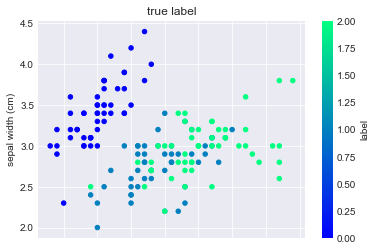

In [110]:
df["cluster"] = cluster
 
df.plot(kind="scatter", x=0,y=1,c="label", cmap="winter") # cmapで散布図の色を変えられます。
plt.title("true label")

### ＜クラスタリングで色付けした可視化＞

Text(0.5,1,'clustering relust')

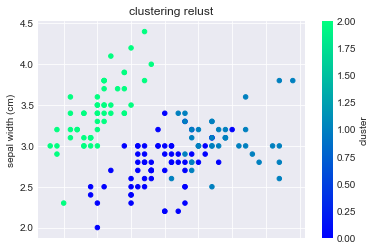

In [111]:
df.plot(kind="scatter", x=0,y=1,c="cluster", cmap="winter")
plt.title("clustering relust")

## （２）PCA

### ①Boston house-prices　のdata setを使って、主成分分析のアルゴリズムをスクラッチで実装した。（出典：「主成分分析を実装してみよう（DevelopersIO produced by Classmethod）」


In [112]:
import numpy as np
import random as rnd
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston

### ＜共分散行列を求める＞

### 全ての列同士の共分散を求めたものが共分散行列となる。

In [113]:
boston = load_boston().data
 
# 各行の平均を求める
boston_mu = [sum(boston[:, row]) / len(boston[:, row]) for row in range(boston.shape[1])]
 
# 共分散行列
## 初期化
cov = np.zeros([boston.shape[1], boston.shape[1]])
 
## 共分散を求める
for i in range(boston.shape[1]):
    for j in range(boston.shape[1]):
        cov[i, j] = sum((boston[:, i] - boston_mu[i]) * (boston[:, j] - boston_mu[j])) / boston.shape[0]



### ＜固有値・固有ベクトルを求める＞

In [114]:
# 固有値・固有ベクトルを求める
l, v = np.linalg.eig(cov)
 
# 固有値をソートした時のインデックスリスト
sl = np.argsort(l)
# インデックスリストの順で固有ベクトルをソート
sv = v[sl]

### ＜変換、第２主成分までをプロット＞

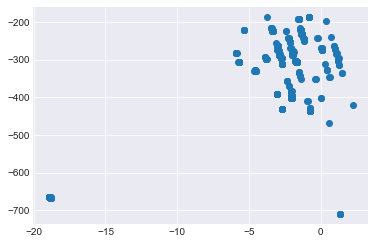

In [115]:
pca = np.dot(boston, sv)
plt.scatter(pca[:, -1], pca[:, -2])

### ②　上記①のアルゴリズムを本件「Wholesale customers data set」に当てはめて実装した。

### ＜共分散行列を求める＞

### 全ての列同士の共分散を求めたものが共分散行列となる。

In [116]:
data_fs_1 = data_fs.iloc[:,:-1].values

In [117]:
# 各行の平均を求める
data_fs_1_mu = [sum(data_fs_1[:, row]) / len(data_fs_1[:, row]) for row in range(data_fs_1.shape[1])]
 
# 共分散行列
## 初期化
cov = np.zeros([data_fs_1.shape[1], data_fs_1.shape[1]])
 
## 共分散を求める
for i in range(data_fs_1.shape[1]):
    for j in range(data_fs_1.shape[1]):
        cov[i, j] = sum((data_fs_1[:, i] - data_fs_1_mu[i]) * (data_fs_1[:, j] - data_fs_1_mu[j])) / data_fs_1.shape[0]

### ＜固有値・固有ベクトルを求める＞

In [118]:
# 固有値・固有ベクトルを求める
l, v = np.linalg.eig(cov)
 
# 固有値をソートした時のインデックスリスト
sl = np.argsort(l)
# インデックスリストの順で固有ベクトルをソート
sv = v[sl]

### ＜変換、第２主成分までをプロット＞

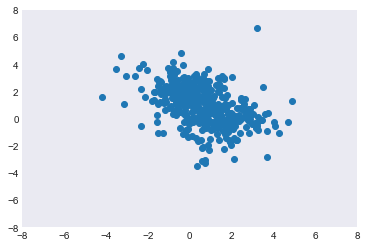

In [119]:
pca = np.dot(data_fs_1, sv)
plt.scatter(pca[:, -1], pca[:, -2])
plt.grid()
plt.xlim(-8,8);
plt.ylim(-8,8);